In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프를 위한 기본 설정
# 폰트 설정
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
# 그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6
# 글자 크기
plt.rcParams['font.size'] = 14
# 폰트 설정시 마이너스 기호가 깨지는 것을 방지한다.
plt.rcParams['axes.unicode_minus'] = False

### 데이터 가져오기

In [9]:
mpg_df = pd.read_excel('data/mpg.xlsx')
mpg_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### 데이터 살펴보기
- manufacturer: 제조사
- model: 자동차 모델명
- displ: 배기량
- year: 생산년도
- cyl: 실린더 개수
- trans: 변속기 종류
- drv: 구동방식
- cty: 도시연비
- hway: 고속도로 연비
- fl: 연료종류(c: 가스, d: 디젤, e: 에탄올 혼합연료, p: 고급 휘발유, r: 일반 휘발유)
- class: 자동차 종류

### 데이터프레임의 정보를 확인

In [11]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB


In [12]:
# 결측치 확인
mpg_df.isna().sum()

Unnamed: 0      0
manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

- 자동차 배기량에 따라 고속도로 연비가 다른지 확인한다.

In [13]:
# 자동차 배기량 데이터가 카테고리형인지 확인
mpg_df['displ'].value_counts()

2.0    21
2.5    20
4.7    17
4.0    15
1.8    14
2.4    13
4.6    11
2.8    10
3.3     9
3.8     8
2.7     8
5.4     8
5.7     8
3.0     8
5.3     6
2.2     6
3.1     6
1.6     5
5.2     5
3.5     5
3.4     4
4.2     4
3.7     3
3.9     3
1.9     3
5.9     2
3.6     2
5.0     2
6.2     2
6.5     1
7.0     1
6.1     1
4.4     1
5.6     1
6.0     1
Name: displ, dtype: int64

In [14]:
# 배기량의 평균을 구함
displ_mean = mpg_df['displ'].mean()
displ_mean

3.4717948717948697

In [16]:
# 배기량이 평균 이하인 자동차들의 고속도로 연비를 구함
mpg_a = mpg_df.query('displ <= @displ_mean')
hwy_mean1 = mpg_a['hwy'].mean()
hwy_mean1

27.133858267716537

In [18]:
# 배기량이 평균 초과인 자동차들의 고속도로 연비를 구함
mpg_b = mpg_df.query('displ > @displ_mean')
hwy_mean2 = mpg_b['hwy'].mean()
hwy_mean2

19.05607476635514

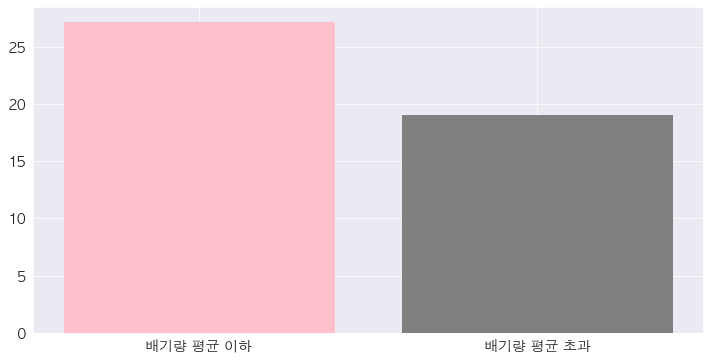

In [20]:
# matplotlib를 통한 막대 그래프
x = ['배기량 평균 이하', '배기량 평균 초과']
y = [hwy_mean1, hwy_mean2]

# matplotlib가 제공하는 그래프 함수들은
# 그래프 요소에 접근할 수 있는 객체를 생성해 반환함

bar_list = plt.bar(x, y)
bar_list[0].set_color('pink')
bar_list[1].set_color('gray')

plt.show()

,배기량 평균 이하,배기량 평균 초과
고속도로 연비 평균,27.133858,19.056075


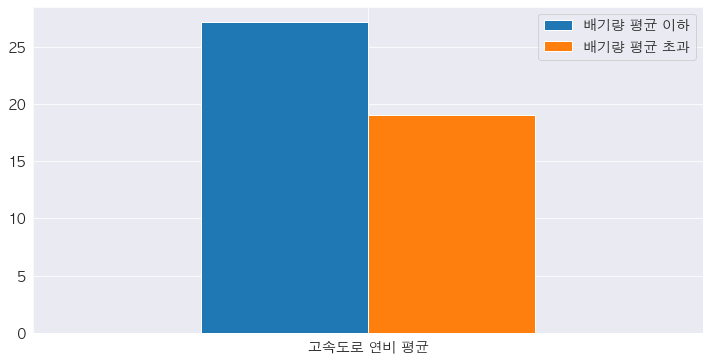

In [22]:
# 데이터프레임을 이용하여 막대 그래프를 그림 1
d1 = {
    '배기량 평균 이하': [hwy_mean1],
    '배기량 평균 초과': [hwy_mean2]
}

tmp_df = pd.DataFrame(d1, index=['고속도로 연비 평균'])
display(tmp_df)

tmp_df.plot.bar()
plt.xticks(rotation=0)
plt.show()

,고속도로 연비 평균
배기량 평균 이하,27.133858
배기량 평균 초과,19.056075


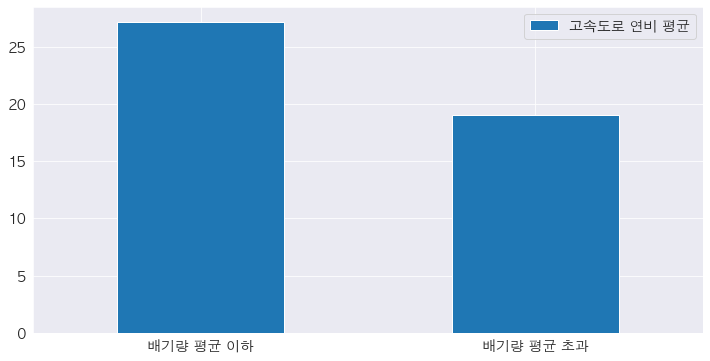

In [25]:
# 데이터프레임을 이용하여 막대 그래프를 그림 2
d1 = {
    '고속도로 연비 평균': [hwy_mean1, hwy_mean2]
}

tmp_df = pd.DataFrame(d1)
tmp_df.index = ['배기량 평균 이하', '배기량 평균 초과']
display(tmp_df)

tmp_df.plot.bar()
plt.xticks(rotation=0)
plt.show()

- 데이터프레임으로 막대 그래프를 그릴때 행은 막대그래프 그룹을 의미하고 컬럼은 그룹내에서의 막대그래프가 됨
- 행수만큼 그룹이 생성되고 컬럼의 수만큼 그룹내의 막대가 생성됨

,배기량,고속도로 연비 평균
0,평균 이하,27.133858
1,평균 초과,19.056075


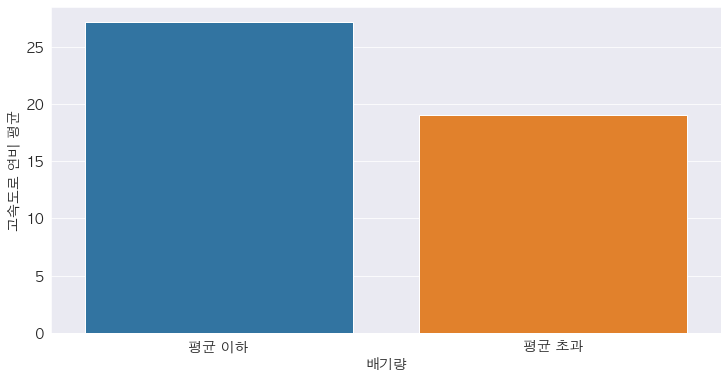

In [27]:
# seaborn을 이용해 막대그래프를 그림
# x축으로 지정될 컬럼과 y축으로 지정될 컬럼을 만들어 줌
d1 = {
    '배기량':['평균 이하', '평균 초과'],
    '고속도로 연비 평균':[hwy_mean1, hwy_mean2]
}

tmp_df = pd.DataFrame(d1)
display(tmp_df)

sns.barplot(data=tmp_df, x='배기량', y = '고속도로 연비 평균')
plt.show()

- 자동차 종류에 따른 시내 연비를 비교해 봄

In [28]:
# 자동차 종류 데이터가 카테고리 형인지 확인해 봄
mpg_df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [29]:
# 자동차 종류와 시내 연비를 가져옴
df_tmp = mpg_df[['class', 'cty']]
df_tmp

,class,cty
0,compact,18
1,compact,21
2,compact,20
3,compact,21
4,compact,16
...,...,...
229,midsize,19
230,midsize,21
231,midsize,16
232,midsize,18


In [30]:
# 자동차 종류별 시내 연비를 구함
df_result = df_tmp.groupby('class', as_index=False).mean()
df_result

,class,cty
0,2seater,15.400000
1,compact,20.127660
2,midsize,18.756098
3,minivan,15.818182
4,pickup,13.000000
5,subcompact,20.371429
6,suv,13.500000


In [31]:
# 정렬함
df_result.sort_values('cty', ascending=False, inplace=True)
df_result.columns = ['자동차 종류', '시내 평균 연비']
df_result

,자동차 종류,시내 평균 연비
5,subcompact,20.371429
1,compact,20.127660
2,midsize,18.756098
3,minivan,15.818182
0,2seater,15.400000
6,suv,13.500000
4,pickup,13.000000


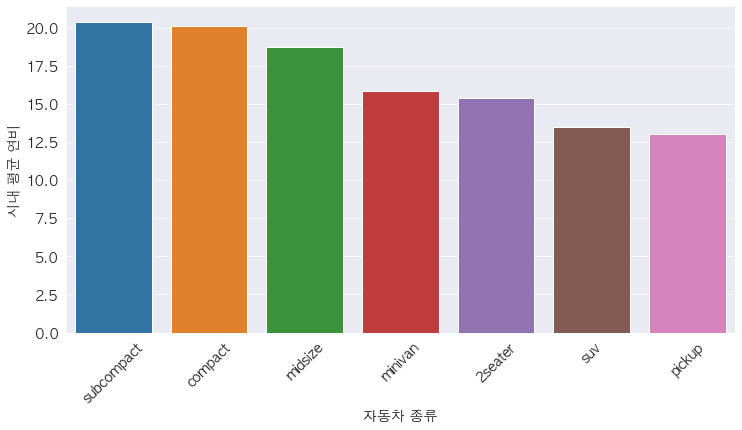

In [32]:
sns.barplot(data=df_result, x='자동차 종류', y='시내 평균 연비')
plt.xticks(rotation=45)
plt.show()